In [138]:
pwd

'/Users/sanjayfuloria'

In [139]:
import os
os.chdir('/Users/sanjayfuloria')

In [140]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [141]:
data=pd.read_csv("bank.csv",header=0)
data=data.dropna()
print (data.shape)
print(list(data.columns))

(45211, 18)
['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [142]:
data.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [143]:
data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

Data Exploration

In [144]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

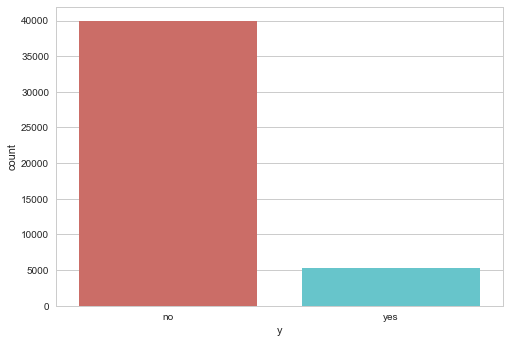

In [145]:
sns.countplot(x='y',data=data,palette='hls')
plt.show()
plt.savefig('count_plot')

Converting 'yes' in the variable column 'y' to 1 and 'no' to 0

In [146]:
data.y[data.y == 'yes'] = 1
data.y[data.y == 'no'] = 0
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub) if (count_no_sub+count_sub) !=0 else 0
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub) if (count_no_sub+count_sub) !=0 else 0
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.30151954170445
percentage of subscription 11.698480458295547


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Our classes are imbalanced, and the ratio of no-subscription to subscription instances is 89:11. Before we go ahead to balance the classes, let’s do some more exploration.

In [147]:
data.groupby(['y']).mean()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,,
0,21198.503081,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
1,33229.953867,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


The average age of customers who bought the term deposit is higher than that of the customers who didn’t.
The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

In [148]:
data.groupby(['job']).mean()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,,
admin.,23225.636627,39.289886,1135.838909,15.564301,246.896732,2.575324,47.859021,0.671630
blue-collar,19597.209721,40.044081,1078.826654,15.442561,262.901562,2.816995,44.033498,0.505138
entrepreneur,21008.053800,42.190989,1521.470074,15.702085,256.309348,2.799597,32.486214,0.478144
housemaid,21539.344355,46.415323,1392.395161,16.002419,245.825000,2.820968,21.505645,0.371774
management,24030.531613,40.449567,1763.616832,16.114189,253.995771,2.864348,38.665468,0.668006
retired,27553.681095,61.626767,1984.215106,15.439488,287.361307,2.346731,37.443905,0.638693
self-employed,23199.673844,40.484484,1647.970868,16.027866,268.157061,2.853072,34.747308,0.551615
services,20873.053924,38.740250,997.088108,15.635532,259.318729,2.718344,41.995185,0.501204
student,33469.698294,26.542644,1388.060768,14.897655,246.656716,2.299574,57.041578,0.953092


In [149]:
data.groupby(['marital']).mean()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
marital,,,,,,,,
divorced,21752.244094,45.782984,1178.872287,15.796428,262.517188,2.630882,41.001728,0.551373
married,21854.207944,43.408099,1425.925590,15.854487,253.412765,2.842875,37.950467,0.556552
single,24553.206880,33.703440,1301.497654,15.708210,266.497967,2.649805,44.652385,0.642690


In [150]:
data.groupby(['education']).mean()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
education,,,,,,,,
primary,20496.166107,45.865567,1250.949934,15.421398,255.933002,2.834331,36.081740,0.489272
secondary,22015.010473,39.964270,1154.880786,15.759159,258.685760,2.700802,42.353504,0.567753
tertiary,24787.013533,39.593640,1758.416435,16.086535,258.518532,2.825577,39.024134,0.661980
unknown,22152.015078,44.510501,1526.754443,15.810985,257.313947,2.849219,36.856220,0.488422


Visualizations

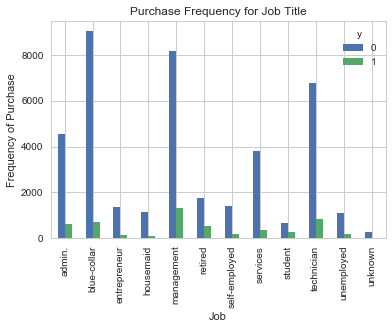

In [151]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

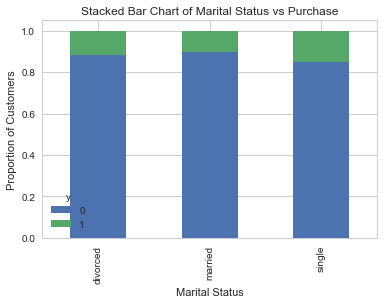

In [152]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('marital_vs_pur_stack')

The marital status does not seem a strong predictor for the outcome variable.

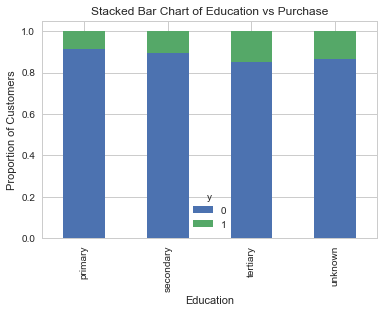

In [153]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

Education seems a good predictor of the outcome variable.

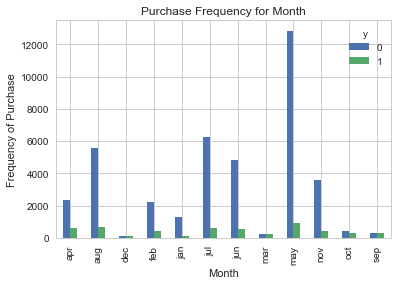

In [154]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

Month might be a good predictor of the outcome variable.

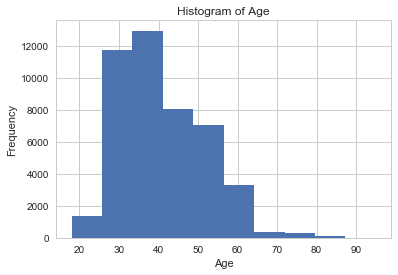

In [155]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

Most of the customers of the bank in this dataset are in the age range of 30–40.

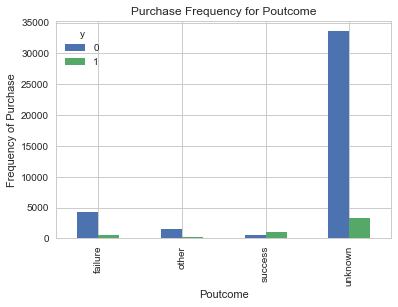

In [156]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

Poutcome seems to be a good predictor of the outcome variable.

Create dummy variables

That is variables with only two values, zero and one.


In [157]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['job','marital','education','default','housing','loan','contact','month','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [158]:
data_final=data[to_keep]
data_final.columns.values

array(['Unnamed: 0', 'age', 'balance', 'day', 'duration', 'campaign',
       'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

Over-sampling using SMOTE
With our training data created, I’ll up-sample the no-subscription using the SMOTE algorithm(Synthetic Minority Oversampling Technique). At a high level, SMOTE:

Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.


#pip install -U imbalanced-learn

In [159]:
!pip install imblearn

Just in case the above 'pip' doesn't work.
#conda install -c glemaitre imbalanced-learn


In [164]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'], dtype="float") #data type has to be converted to float for ease later on
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/imblearn/utils/validation.py:77: UserWarning: 'y' should be of types ('binary', 'multiclass') only. Got unknown instead.
  TARGET_KIND, type_of_target(y)))
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


length of oversampled data is  55906
Number of no subscription in oversampled data 27953
Number of subscription 27953
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


Now we have a perfect balanced data! You may have noticed that I over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

Recursive Feature Elimination
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [165]:
data_final_vars=data_final.columns.values.tolist()
y= np.asarray(['y'],dtype="|S6")
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False  True
 False False False False False False False False False  True False False
 False False False False False  True False  True False  True False  True
 False  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True]
[32 29 33 28 27 20 31 25  7  5  4  1  8 14  9  3 21  6 30 10 17  1 15 18 24
 11 23  2 22  1 13  1 16  1 12  1 26  1  1  1  1  1 19  1  1  1  1  1  1  1
  1  1]


The RFE has helped us select the following features: “job_management”, “marital_single”, “housing”, “loan_yes”, “education_illiterate”, “default_no”, “default_unknown”, “contact_cellular”, “contact_telephone”, “month_apr”, “month_aug”, “month_dec”, “month_jul”, “month_jun”, “month_mar”, “month_may”, “month_nov”, “month_oct”, “poutcome_failure”, “poutcome_success”.

In [169]:
cols=['job_management', 'marital_single', 'housing_yes', 'default_no',  
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']

Implementing the model

In [170]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.569344
         Iterations 7
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.179     
Dependent Variable:  y                AIC:              63693.5453
Date:                2018-11-08 16:11 BIC:              63845.3796
No. Observations:    55906            Log-Likelihood:   -31830.   
Df Model:            16               LL-Null:          -38751.   
Df Residuals:        55889            LLR p-value:      0.0000    
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      7.0000                                       
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
job_management     0.0299   0.0249   1.2001 0.2301 -0.0189  0.0788
marital_single     0.3554   0.0222  16.0157 0.0000  0

The p-values for most of the variables are smaller than 0.05, except one variable, therefore, we will remove it.

In [171]:
cols=['marital_single', 'housing_yes', 'default_no',  
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.569357
         Iterations 7
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.179     
Dependent Variable:  y                AIC:              63692.9849
Date:                2018-11-08 16:18 BIC:              63835.8877
No. Observations:    55906            Log-Likelihood:   -31830.   
Df Model:            15               LL-Null:          -38751.   
Df Residuals:        55890            LLR p-value:      0.0000    
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      7.0000                                       
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
marital_single     0.3565   0.0222  16.0765 0.0000  0.3131  0.4000
housing_yes       -0.6660   0.0229 -29.1184 0.0000 -0

Logistic Regression Model Fitting

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Predicting the test set results and calculating the accuracy

In [173]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.70


Confusion Matrix

In [174]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6762 1606]
 [3350 5054]]


The result is telling us that we have 6762+5054 correct predictions and 1606+3350 incorrect predictions.

Compute precision, recall, F-measure and support
To quote from Scikit Learn:

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [175]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.67      0.81      0.73      8368
        1.0       0.76      0.60      0.67      8404

avg / total       0.71      0.70      0.70     16772



Interpretation: Of the entire test set, 70% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 70% of the customer’s preferred term deposits that were promoted.



ROC Curve

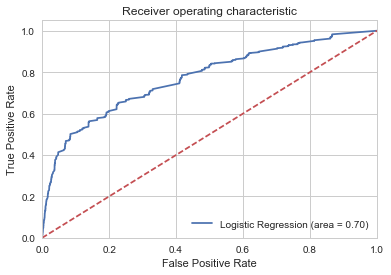

In [176]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).